In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecom-churn-dataset/telecom_churn.csv


In [2]:
import numpy as np
import pandas as pd

In [3]:
data=pd.read_csv(r'/kaggle/input/telecom-churn-dataset/telecom_churn.csv')

In [4]:
data.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   customer_id           243553 non-null  int64 
 1   telecom_partner       243553 non-null  object
 2   gender                243553 non-null  object
 3   age                   243553 non-null  int64 
 4   state                 243553 non-null  object
 5   city                  243553 non-null  object
 6   pincode               243553 non-null  int64 
 7   date_of_registration  243553 non-null  object
 8   num_dependents        243553 non-null  int64 
 9   estimated_salary      243553 non-null  int64 
 10  calls_made            243553 non-null  int64 
 11  sms_sent              243553 non-null  int64 
 12  data_used             243553 non-null  int64 
 13  churn                 243553 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 26.0+ MB


In [6]:
data.isnull().sum()

customer_id             0
telecom_partner         0
gender                  0
age                     0
state                   0
city                    0
pincode                 0
date_of_registration    0
num_dependents          0
estimated_salary        0
calls_made              0
sms_sent                0
data_used               0
churn                   0
dtype: int64

In [7]:
data.nunique()

customer_id             243553
telecom_partner              4
gender                       2
age                         57
state                       28
city                         6
pincode                 213442
date_of_registration      1220
num_dependents               5
estimated_salary        110032
calls_made                 119
sms_sent                    59
data_used                11837
churn                        2
dtype: int64

In [8]:
data.customer_id.unique() 

array([     1,      2,      3, ..., 243551, 243552, 243553])

In [9]:
data.shape

(243553, 14)

In [10]:
data['customer_id'].duplicated().sum()

0

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns 

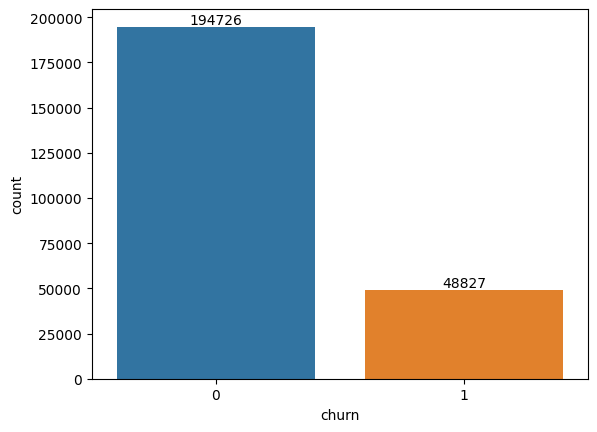

In [12]:
ax=sns.countplot( data=data, x='churn' )
ax.bar_label(ax.containers[0])
plt.show()

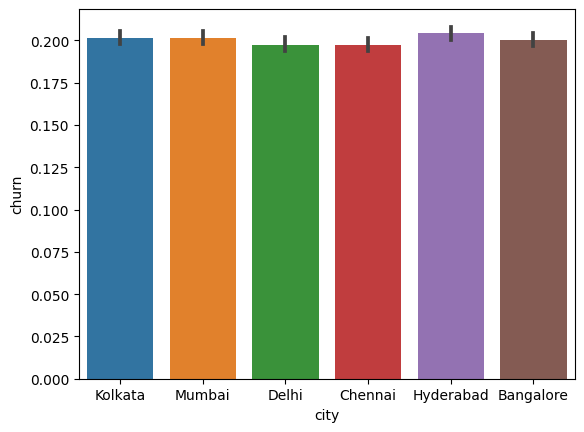

In [13]:
sns.barplot(data=data,x='city',y='churn' )
plt.show()

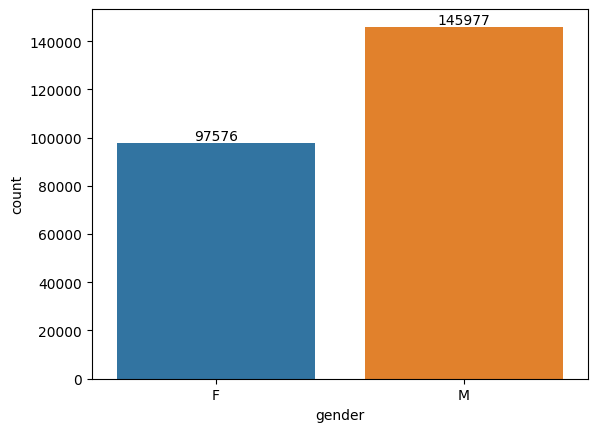

In [14]:
ax=sns.countplot(data=data,x='gender')
ax.bar_label(ax.containers[0])
plt.show()

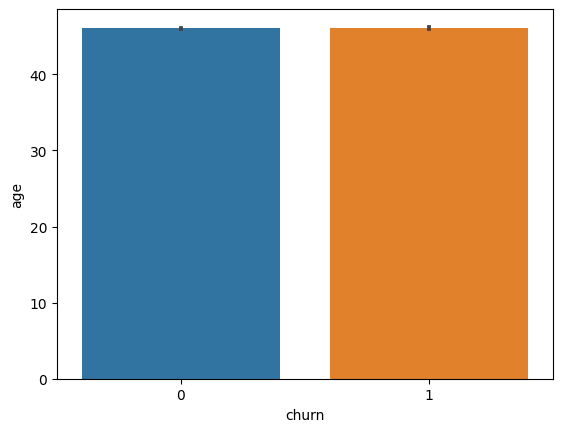

In [15]:
sns.barplot(data=data,x='churn',y='age')
plt.show()

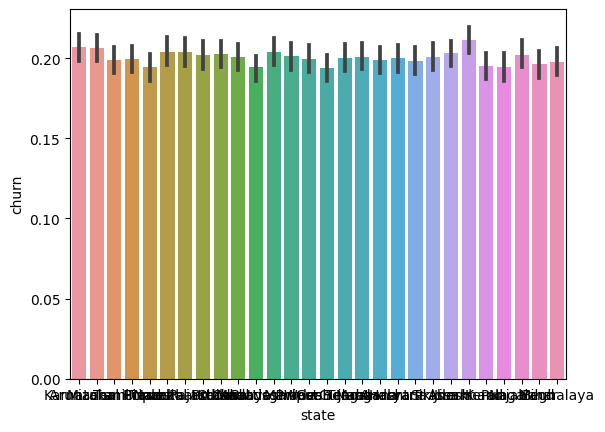

In [16]:
sns.barplot(data=data,x='state',y='churn')
plt.show()

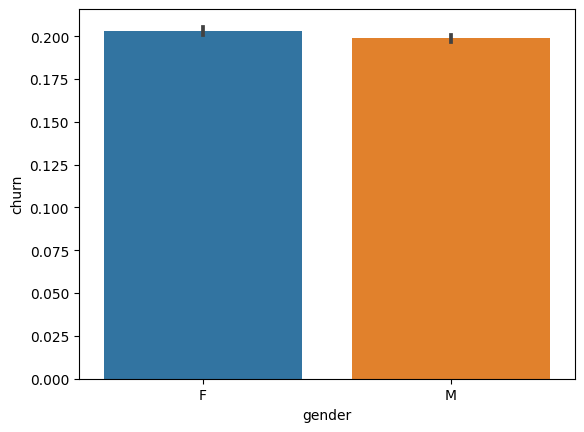

In [17]:
sns.barplot(data=data,x='gender' ,y='churn')
plt.show()

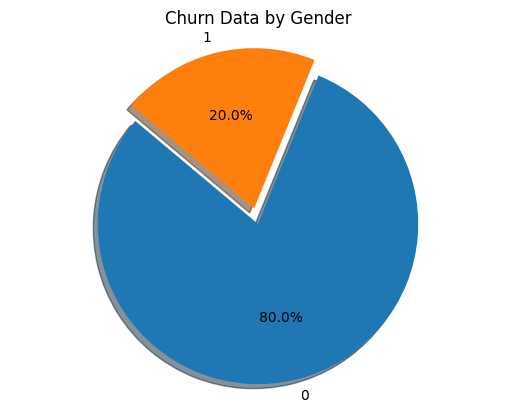

In [18]:


# Assuming data is your DataFrame
churn_data = data["churn"].value_counts()  # Count occurrences of each churn type
gender_data = data["gender"].value_counts()  # Count occurrences of each gender

# Create pie chart
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
explode = (0.1,0)  # Adjust based on the number of unique churn categories
labels = churn_data.index  # Use churn categories as labels
sizes = churn_data.values  # Corresponding values for the pie chart

plt.pie(sizes, labels=labels, explode=explode, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title("Churn Data by Gender")
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular.
plt.show()


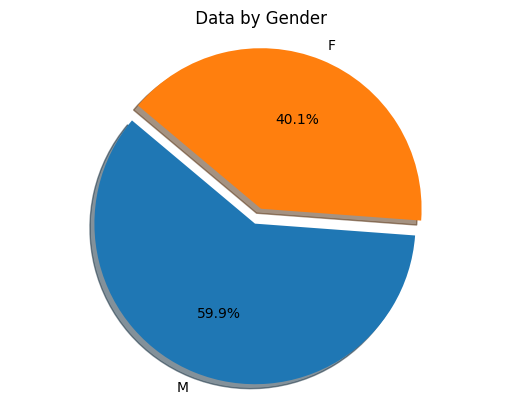

In [19]:

# Assuming data is your DataFrame
churn_data = data["churn"].value_counts()  # Count occurrences of each churn type
gender_data = data["gender"].value_counts()  # Count occurrences of each gender

# Create pie chart
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
explode = (0.1,0)  # Adjust based on the number of unique churn categories
labels = gender_data.index  # Use gender categories as labels
sizes = gender_data.values  # Corresponding values for the pie chart

plt.pie(sizes, labels=labels, explode=explode, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title(" Data by Gender")
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular.
plt.show()


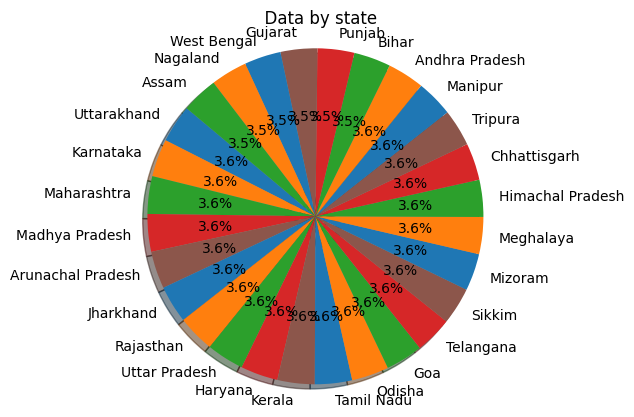

In [29]:
# Assuming data is your DataFrame
state_data = data["state"].value_counts()  # Count occurrences of each state type

# Create pie chart
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
   # Adjust based on the number of unique state categories
labels = state_data.index  # Use state categories as labels
sizes = state_data.values  # Corresponding values for the pie chart

plt.pie(sizes, labels=labels,   colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title("  Data by state")
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular.
plt.show()


In [31]:
x=data['churn'].value_counts()



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


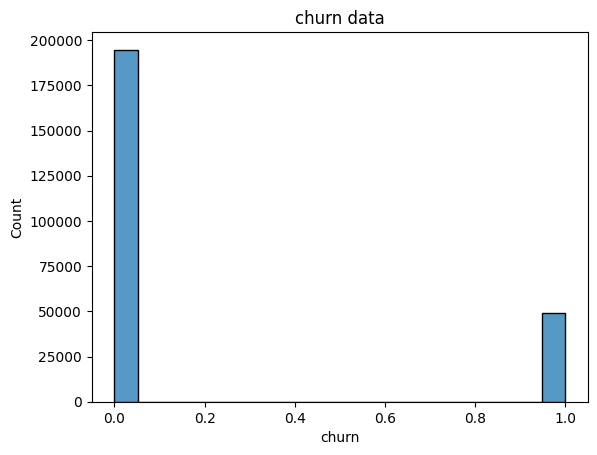

In [32]:
sns.histplot(data['churn'])
plt.title('churn data')
plt.show()

In [34]:

data


,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243548,243549,Airtel,F,28,Mizoram,Kolkata,110295,2023-05-03,3,130580,28,9,4102,0
243549,243550,Reliance Jio,F,52,Assam,Kolkata,713481,2023-05-03,0,82393,80,45,7521,0
243550,243551,Reliance Jio,M,59,Tripura,Kolkata,520218,2023-05-03,4,51298,26,4,6547,0
243551,243552,BSNL,M,49,Madhya Pradesh,Kolkata,387744,2023-05-03,2,83981,80,15,1125,0


In [36]:
y=gender_data.index


In [37]:
data.describe()

,customer_id,age,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
count,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000
mean,121777.000000,46.077609,549501.270541,1.997500,85021.137839,49.010548,23.945404,4993.186025,0.200478
std,70307.839393,16.444029,259808.860574,1.414941,37508.963233,29.453556,14.733575,2942.019547,0.400359
min,1.000000,18.000000,100006.000000,0.000000,20000.000000,-10.000000,-5.000000,-987.000000,0.000000
25%,60889.000000,32.000000,324586.000000,1.000000,52585.000000,24.000000,11.000000,2490.000000,0.000000
50%,121777.000000,46.000000,548112.000000,2.000000,84990.000000,49.000000,24.000000,4987.000000,0.000000
75%,182665.000000,60.000000,774994.000000,3.000000,117488.000000,74.000000,36.000000,7493.000000,0.000000
max,243553.000000,74.000000,999987.000000,4.000000,149999.000000,108.000000,53.000000,10991.000000,1.000000


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   customer_id           243553 non-null  int64 
 1   telecom_partner       243553 non-null  object
 2   gender                243553 non-null  object
 3   age                   243553 non-null  int64 
 4   state                 243553 non-null  object
 5   city                  243553 non-null  object
 6   pincode               243553 non-null  int64 
 7   date_of_registration  243553 non-null  object
 8   num_dependents        243553 non-null  int64 
 9   estimated_salary      243553 non-null  int64 
 10  calls_made            243553 non-null  int64 
 11  sms_sent              243553 non-null  int64 
 12  data_used             243553 non-null  int64 
 13  churn                 243553 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 26.0+ MB


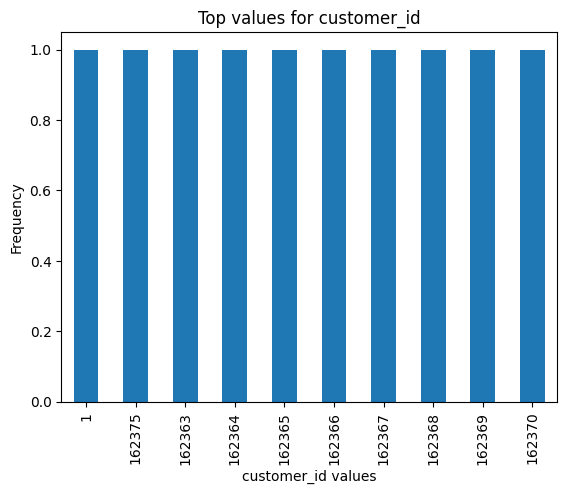

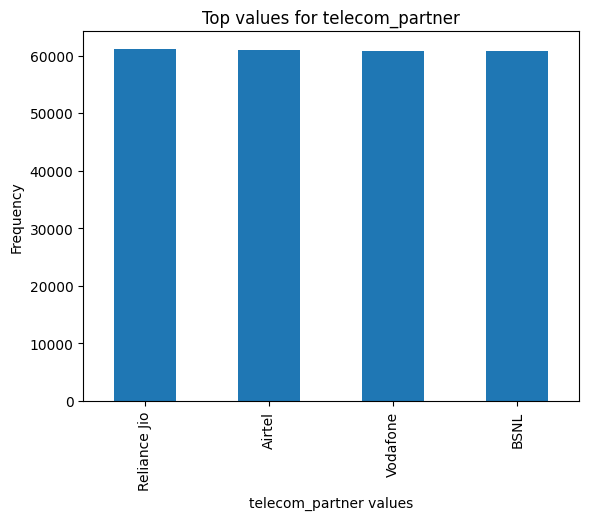

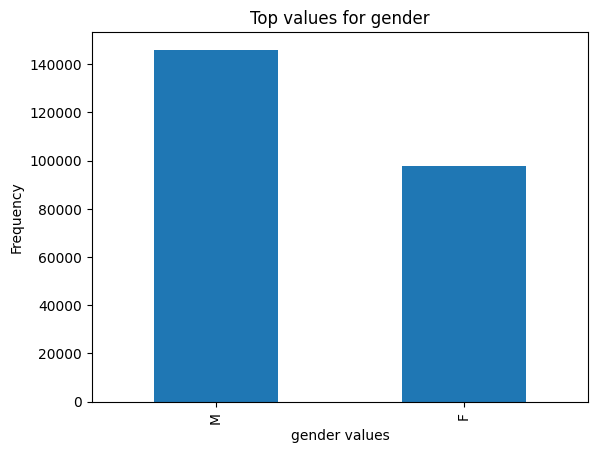

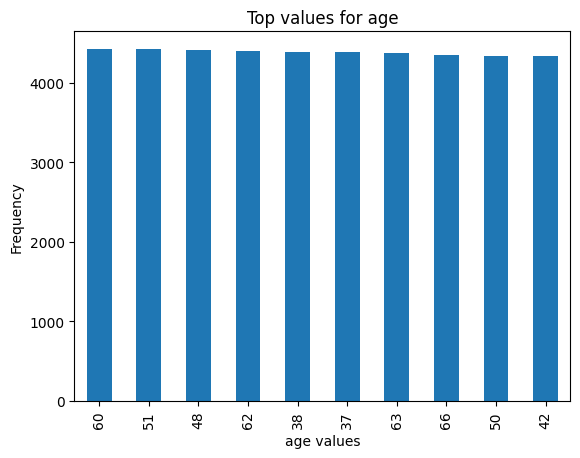

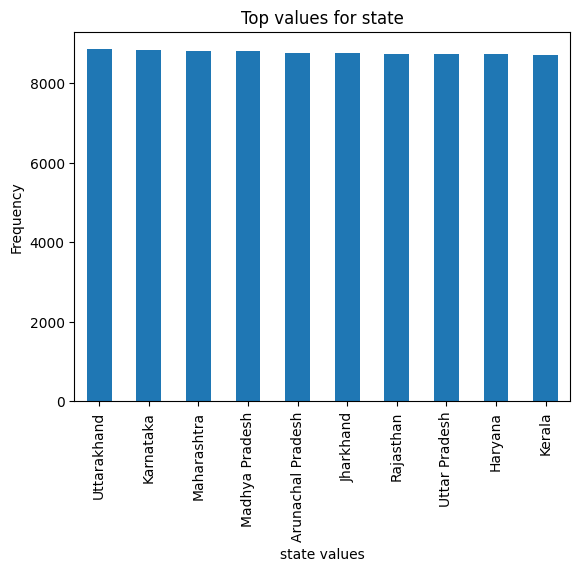

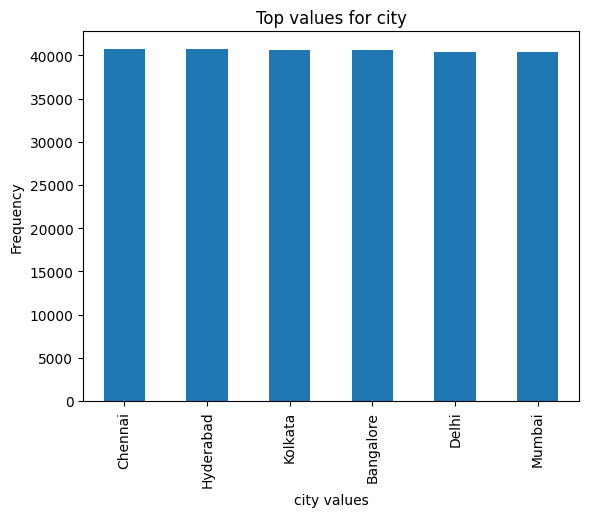

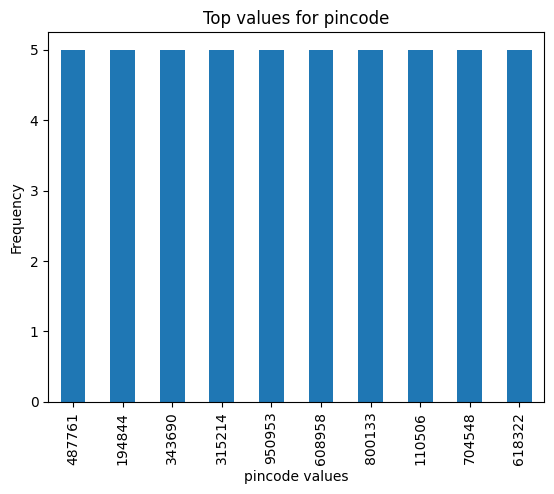

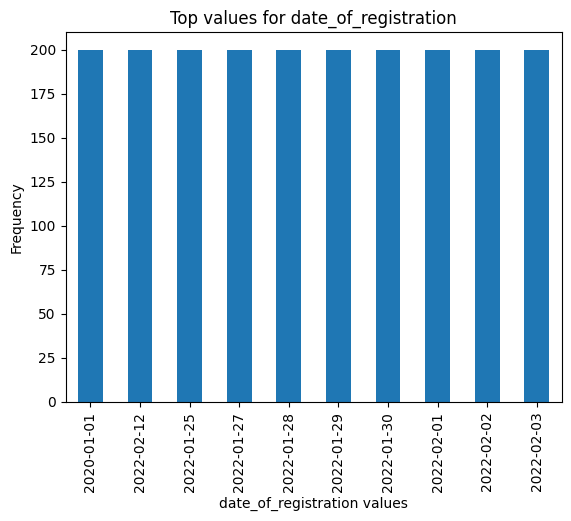

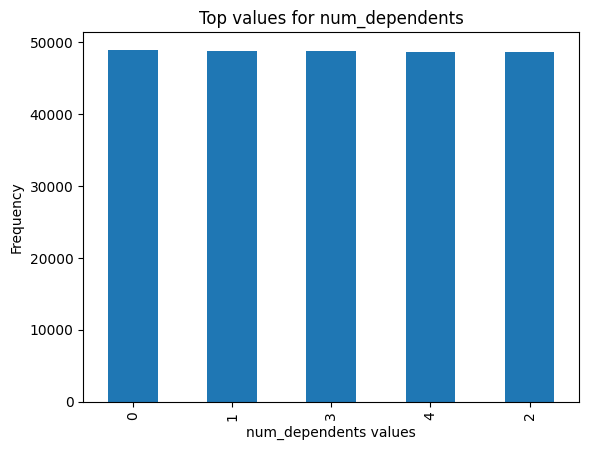

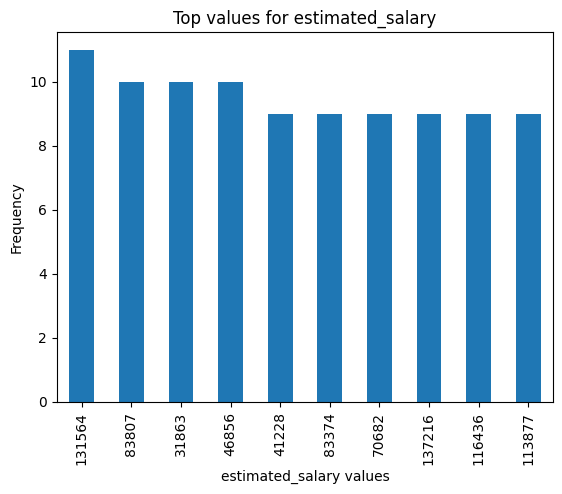

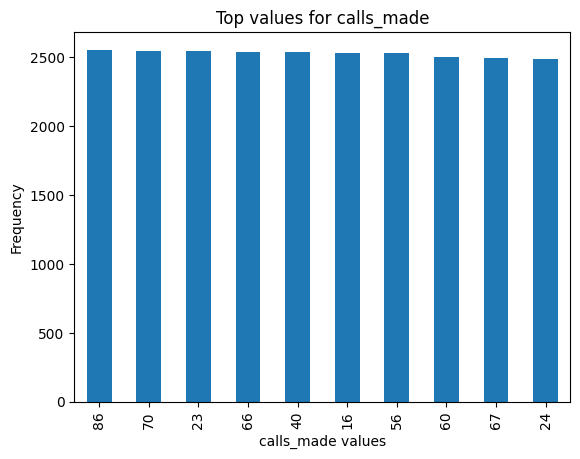

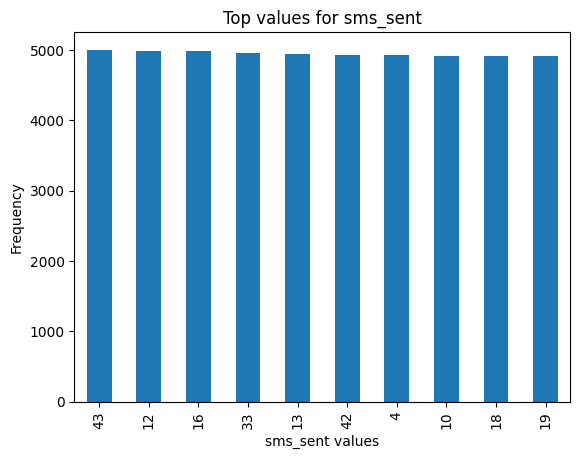

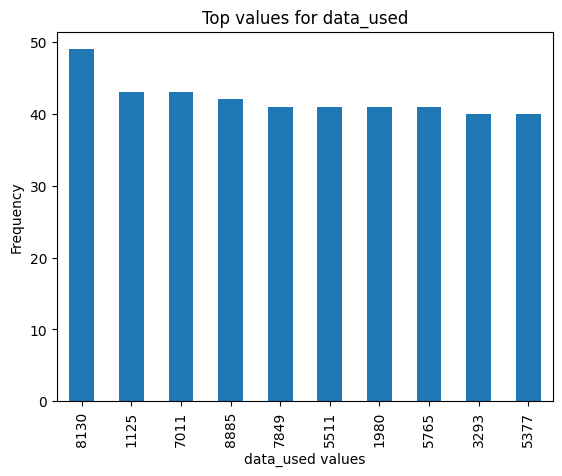

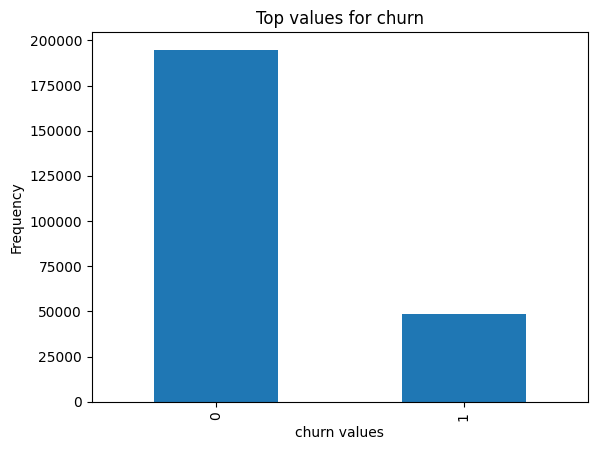

In [48]:


# Assuming `data` is your DataFrame
columns = data.columns  # Assign columns from the DataFrame

for column in columns:
    data[column].value_counts().head(10).plot(kind='bar')  # Modify `10` to however many top values you want
    plt.title(f"Top values for {column}")
    plt.ylabel("Frequency")
    plt.xlabel(f"{column} values")
    plt.show()

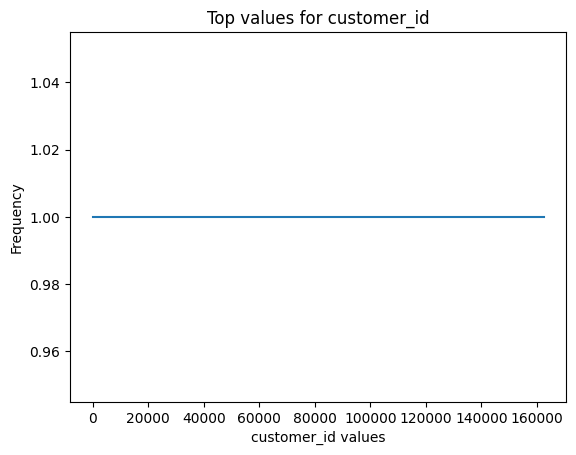

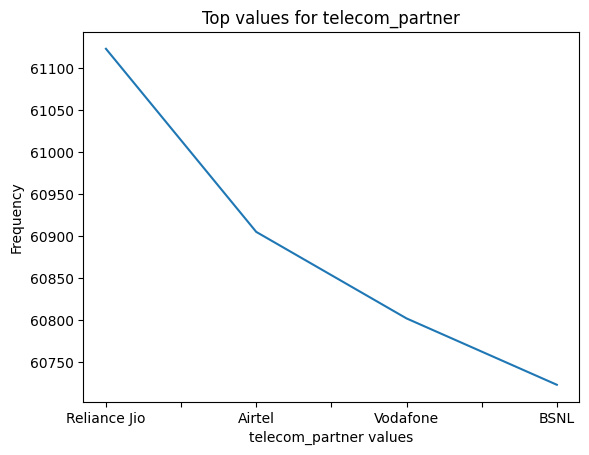

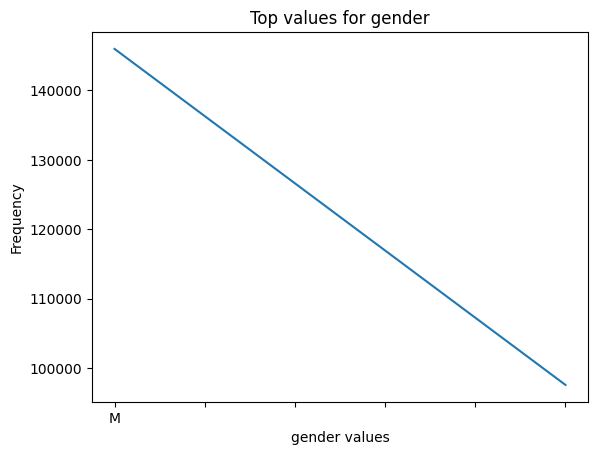

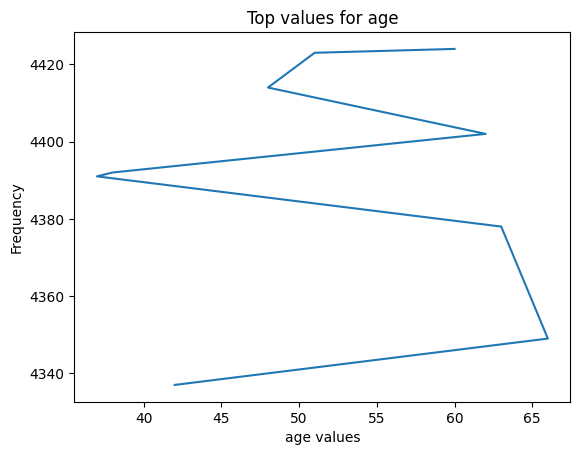

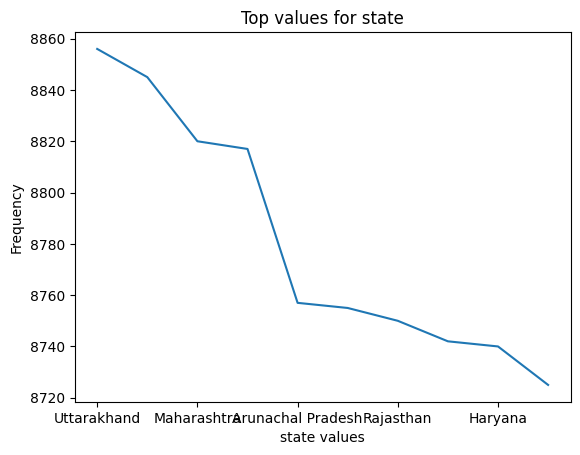

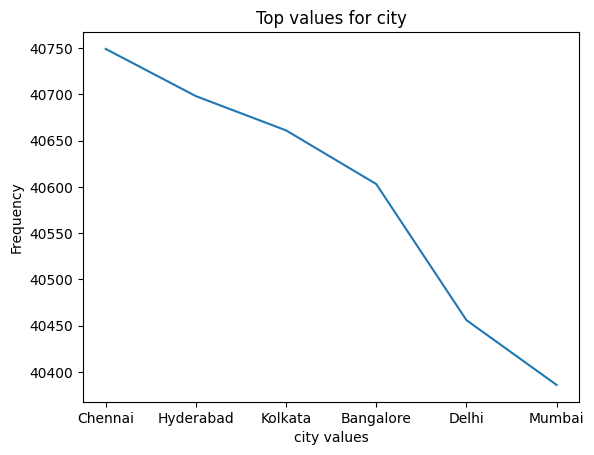

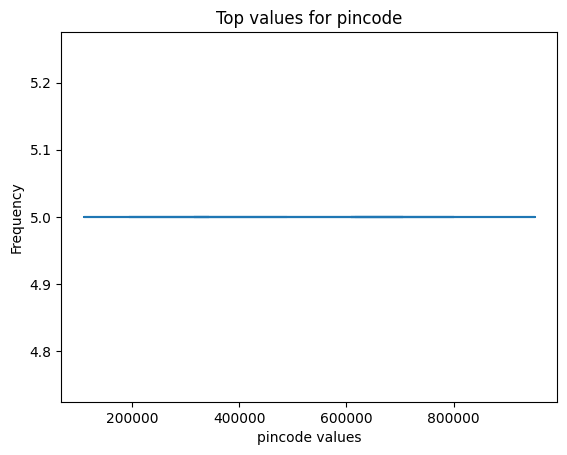

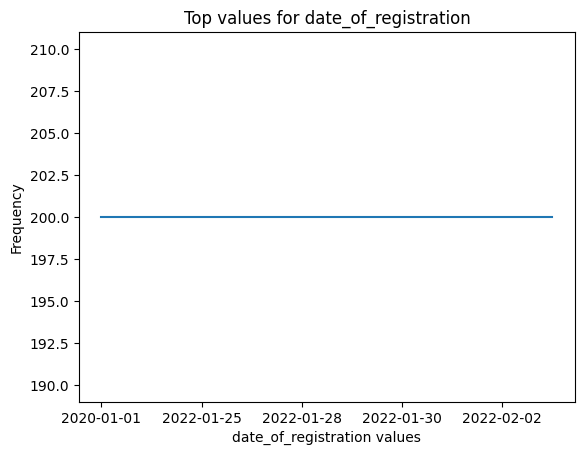

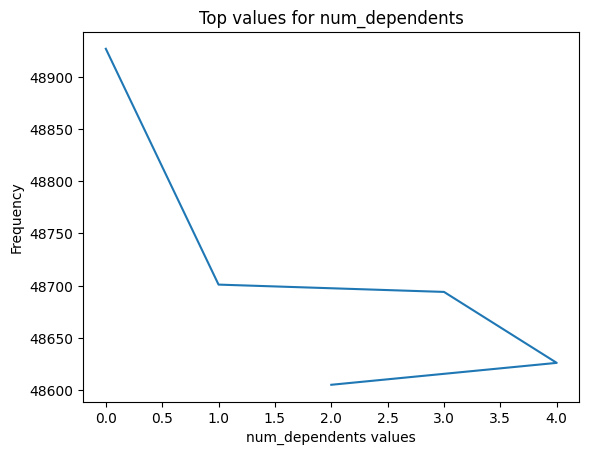

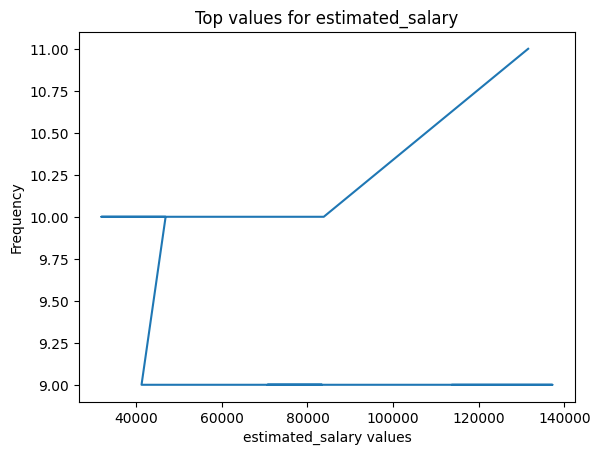

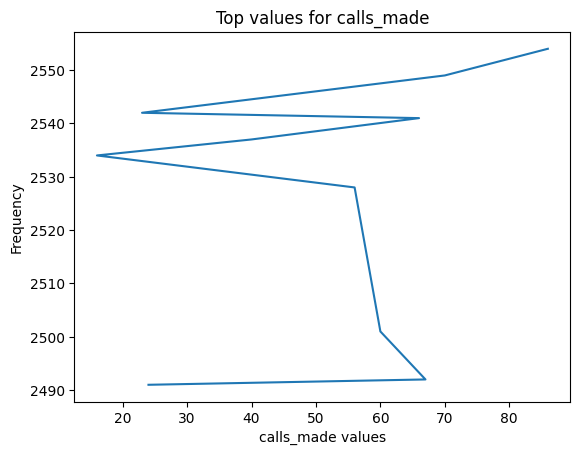

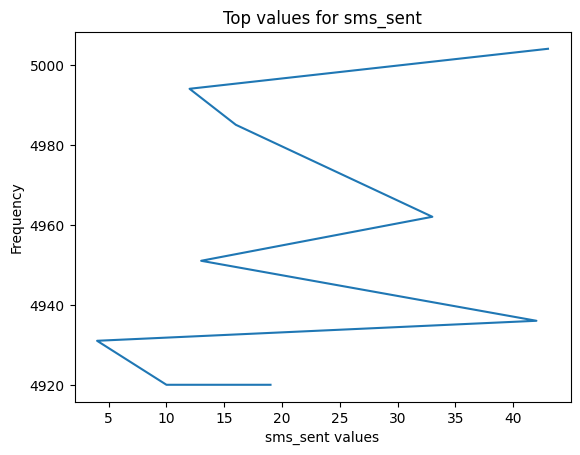

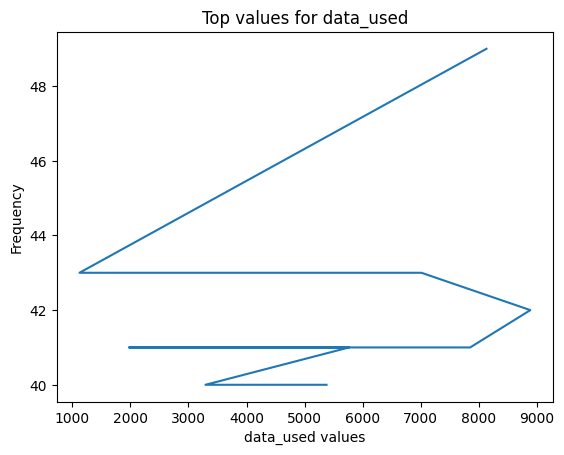

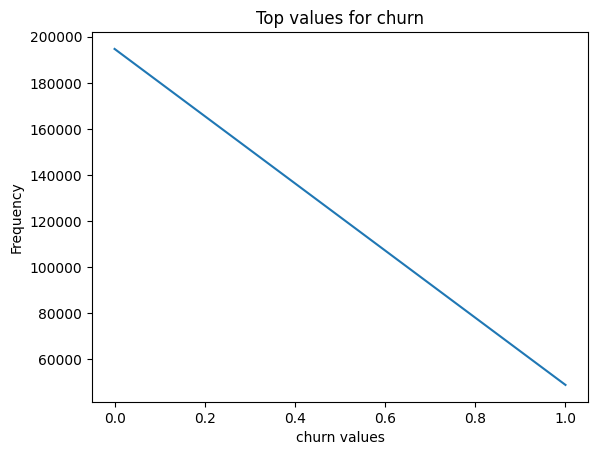

In [49]:
 

# Assuming `data` is your DataFrame
columns = data.columns  # Assign columns from the DataFrame

for column in columns:
    data[column].value_counts().head(10).plot(kind='line')  # Modify `10` to however many top values you want
    plt.title(f"Top values for {column}")
    plt.ylabel("Frequency")
    plt.xlabel(f"{column} values")
    plt.show()

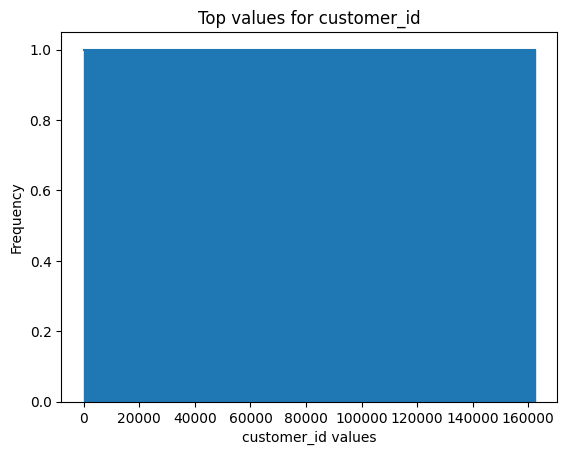

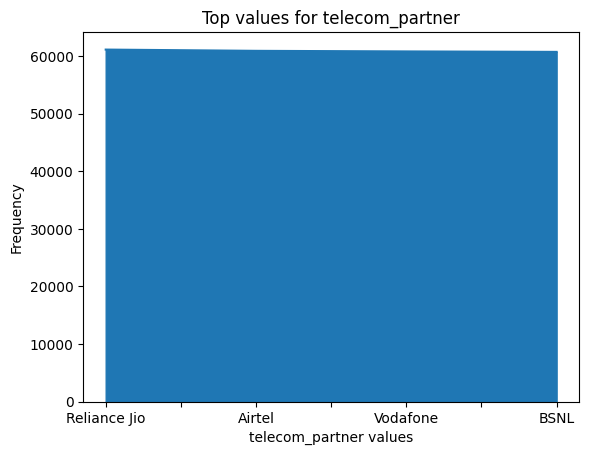

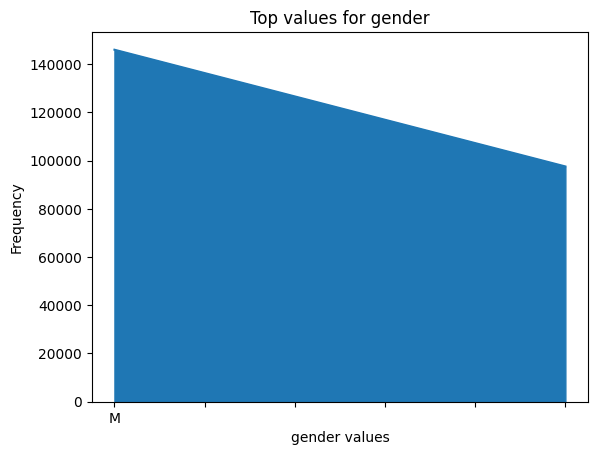

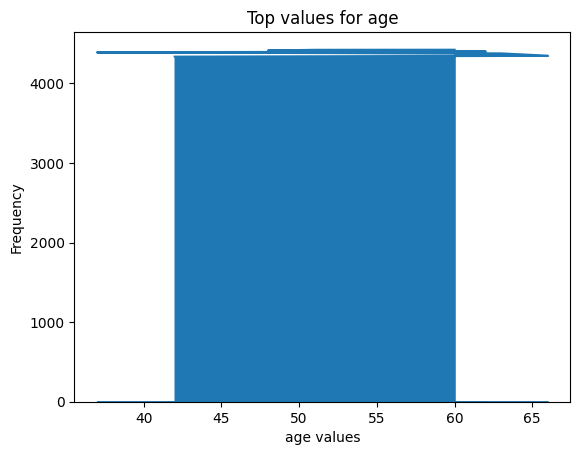

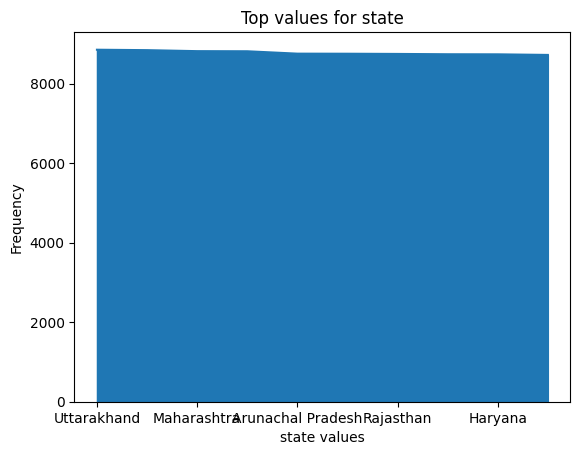

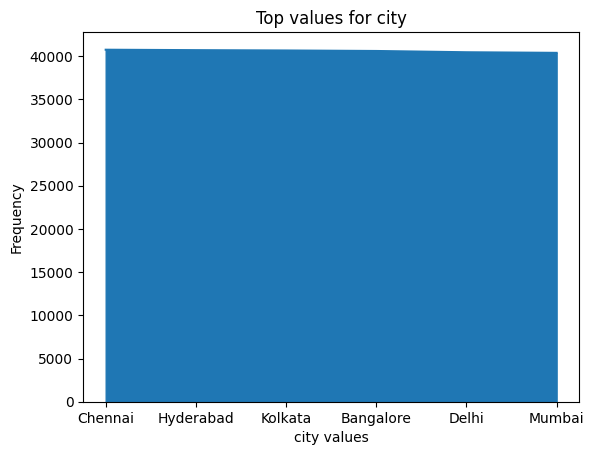

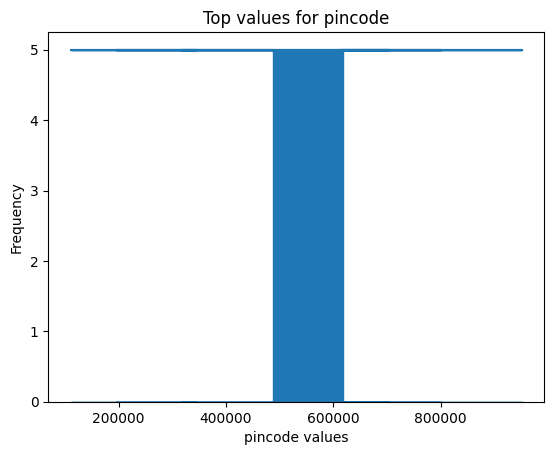

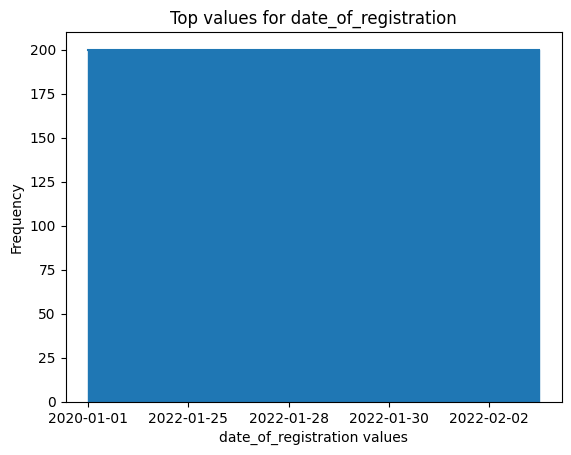

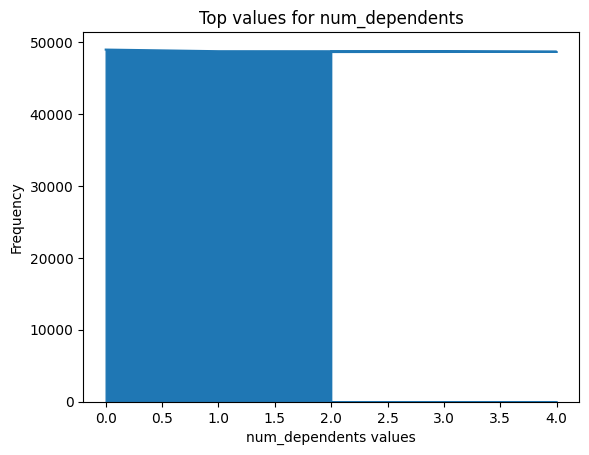

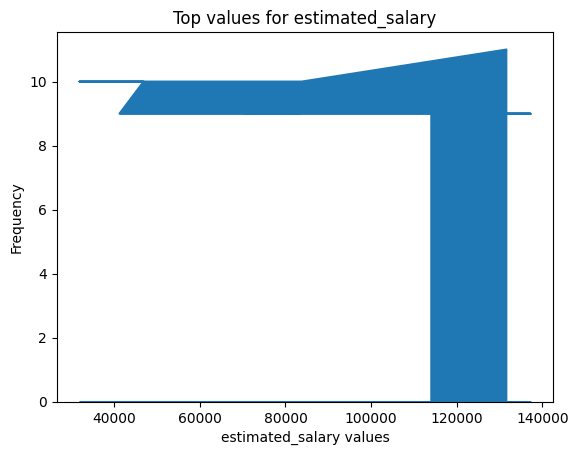

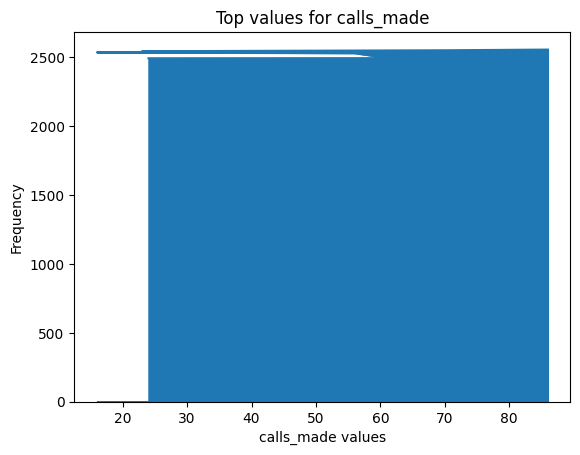

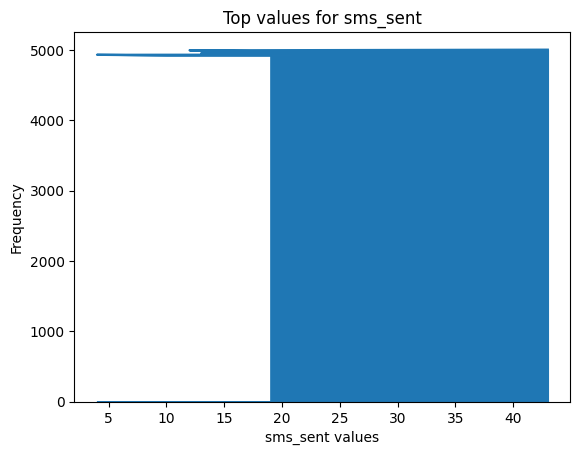

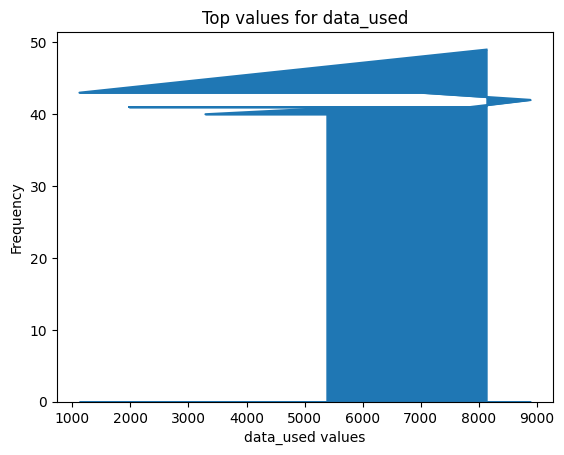

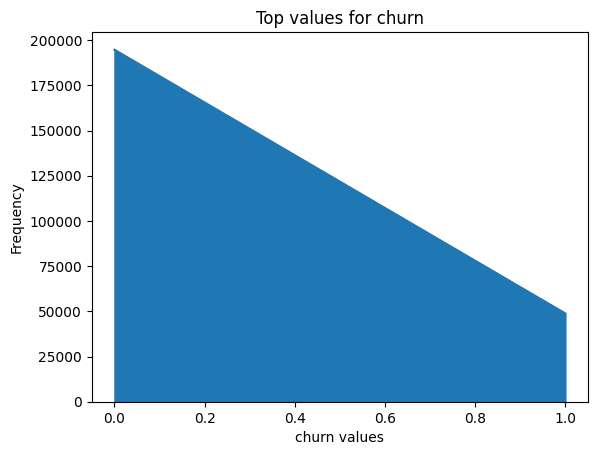

In [54]:
# Assuming `data` is your DataFrame
columns = data.columns  # Assign columns from the DataFrame

for column in columns:
    data[column].value_counts().head(10).plot(kind='area')  # Modify `10` to however many top values you want
    plt.title(f"Top values for {column}")
    plt.ylabel("Frequency")
    plt.xlabel(f"{column} values")
    plt.show()

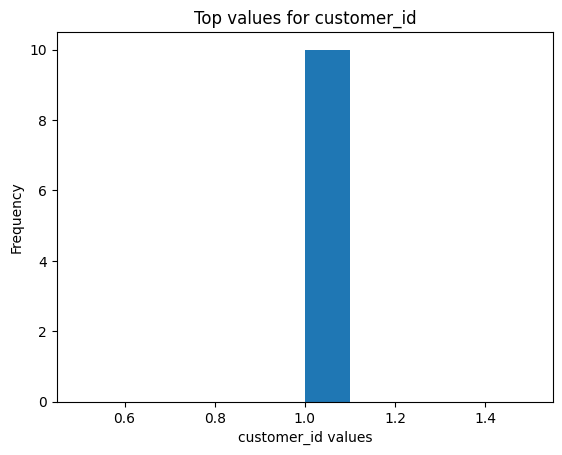

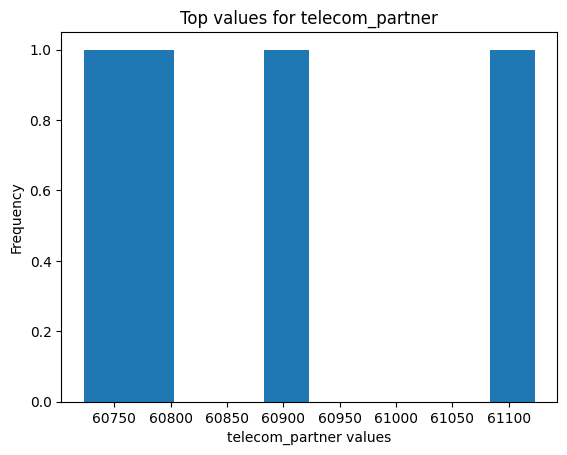

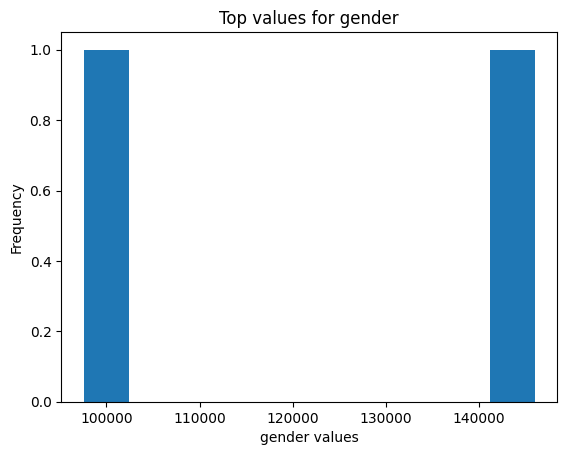

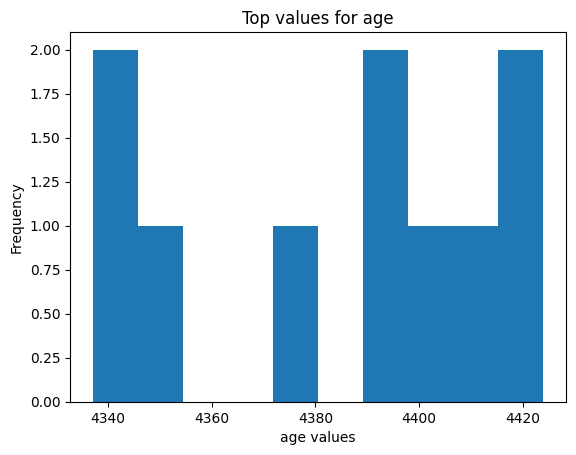

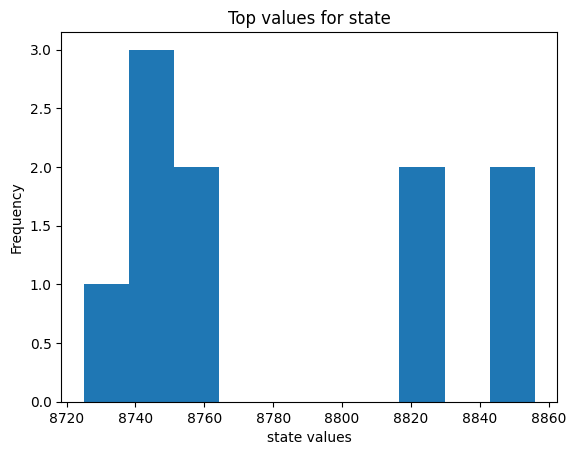

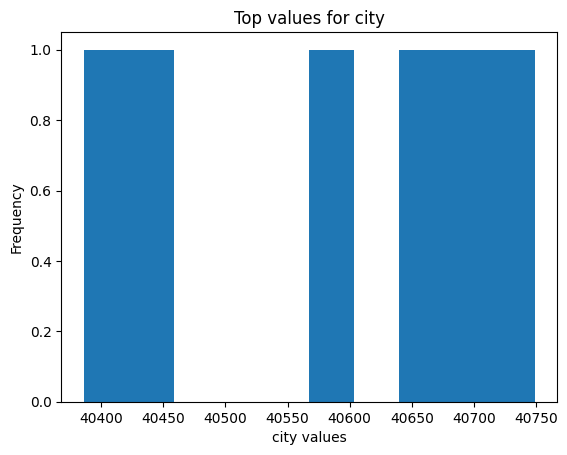

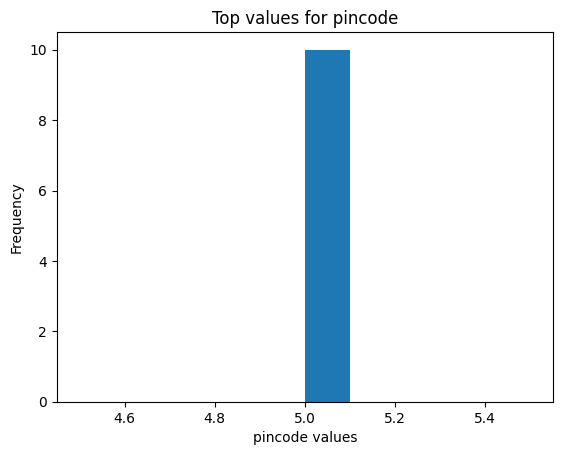

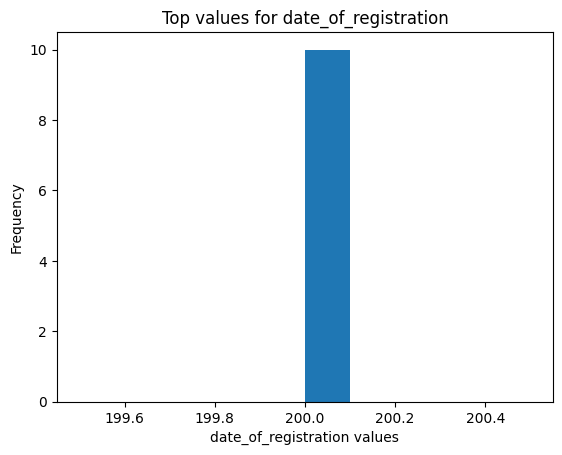

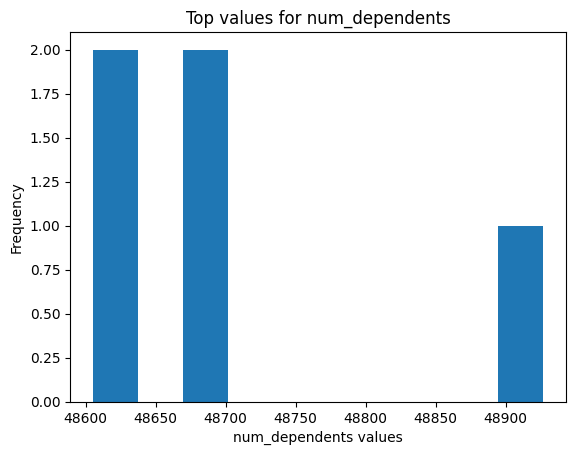

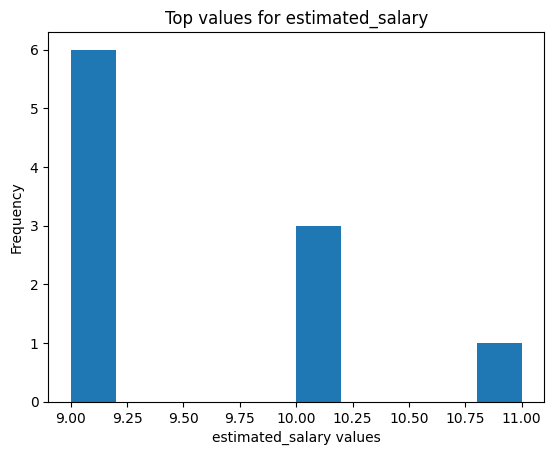

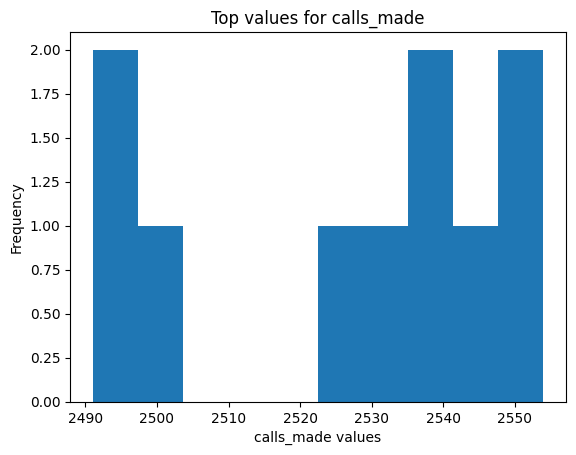

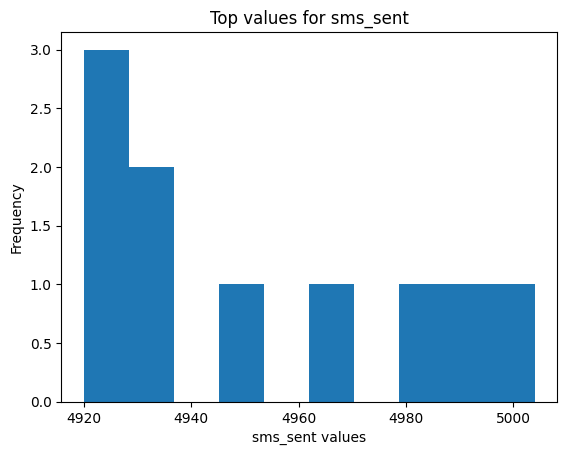

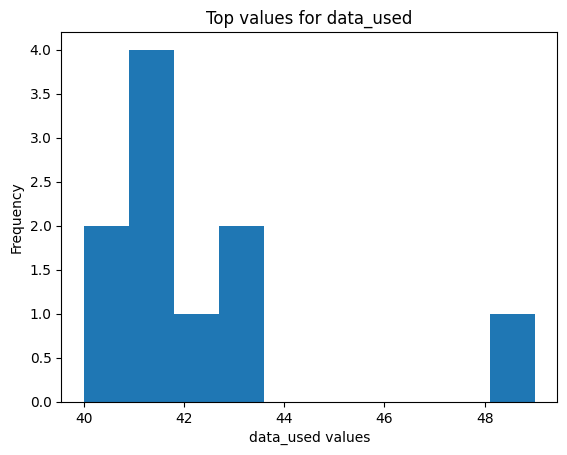

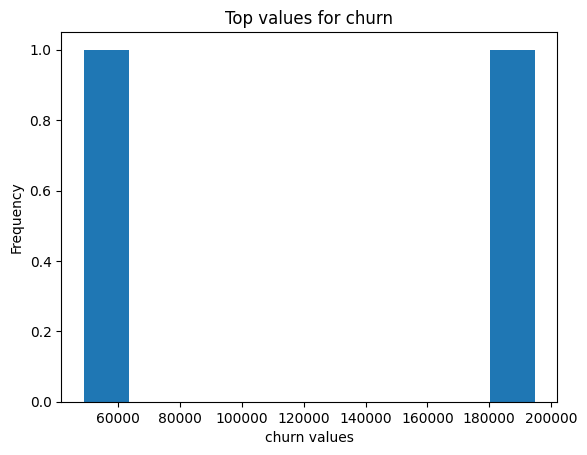

In [55]:
# Assuming `data` is your DataFrame
columns = data.columns  # Assign columns from the DataFrame

for column in columns:
    data[column].value_counts().head(10).plot(kind='hist')  # Modify `10` to however many top values you want
    plt.title(f"Top values for {column}")
    plt.ylabel("Frequency")
    plt.xlabel(f"{column} values")
    plt.show()